In [1]:
%matplotlib inline
import matplotlib
from matplotlib.font_manager import FontProperties
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{amssymb}'
from matplotlib import rc
rc('text', usetex=True)

from tqdm import tqdm

from PETITE.ryan_shower import Shower
from PETITE.particle import *
from PETITE.shower import Shower as OldShower

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FixedLocator
import cProfile
profile = cProfile.Profile()
import pstats

font0 = FontProperties()
font = font0.copy()
font.set_size(24)
font.set_family('serif')
labelfont=font0.copy()
labelfont.set_size(20)
labelfont.set_weight('bold')
legfontBig=font0.copy()
legfontBig.set_size(18)
legfontBig.set_weight('bold')

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

Comparison: Electrons/Photons injected with equal energy to graphite using old/new prescription

In [68]:
E0 = 10.0
p0 = Particle(11, E0, 0., 0., np.sqrt(E0**2 - 0.000511**2), 0, 0, 0, 1, 0, 0, 0, -1, 1.)
p0G = Particle(22, E0, 0, 0, E0, 0, 0, 0, 1, 0, 0, 0, -1, 1.)
MinEnergy = 0.010
sGraphite = Shower('/Users/kjkelly/Documents/GitHub/PETITE/RyanDicts/Feb13_', 'graphite', MinEnergy,neval=10000,maxF_fudge_global=50.0)
sGraphite7 = Shower('/Users/kjkelly/Documents/GitHub/PETITE/RyanDicts/Feb7_', 'graphite', MinEnergy,neval=10000,maxF_fudge_global=50.0)
sGraphiteOld = OldShower('/Users/kjkelly/Documents/GitHub/PETITE/NBP/', 'graphite', MinEnergy)

In [107]:
nSamp = 20000
s0 = np.array([sGraphite.ElecBremSample(p0, VB=True) for i in range(nSamp)])
s0G = np.array([sGraphite.PairProdSample(p0G, VB=True) for i in range(nSamp)])

In [10]:
nSamp = 2000
s0Compton = np.array([sGraphite.ComptonSample(p0G, VB=True) for i in range(nSamp)])

In [108]:
def slowfunction():
    s0 = np.array([sGraphite.ElecBremSample(p0) for i in range(nSamp)])
    s0G = np.array([sGraphite.PairProdSample(p0G) for i in range(nSamp)])
    return

In [109]:
profile.runcall(slowfunction)


In [110]:
ps = pstats.Stats(profile)
ps.print_stats()

         4185082 function calls (4105082 primitive calls) in 29.981 seconds

   Random listing order was used

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    78852    0.004    0.000    0.004    0.000 {method 'append' of 'list' objects}
   160000    0.007    0.000    0.007    0.000 {method 'items' of 'dict' objects}
    80000    0.029    0.000    0.029    0.000 {built-in method builtins.getattr}
   157704    0.011    0.000    0.011    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
    80000    0.007    0.000    0.007    0.000 /Users/kjkelly/Documents/miniforge3/envs/kjk/lib/python3.10/site-packages/numpy/core/multiarray.py:740(dot)
    80000    0.027    0.000    0.207    0.000 <__array_function__ internals>:177(dot)
   160000    0.042    0.000    0.042    0.000 /Users/kjkelly/Documents/miniforge3/envs/kjk/lib/python3.10/site-packages/numpy/core/fromnumeric.py:70(<dictcomp>)


In [47]:
s0Old = np.array([sGraphiteOld.ElecBremSample(p0) for i in range(nSamp)])
s0GOld = np.array([sGraphiteOld.PhotonSplitSample(p0G) for i in range(nSamp)])

In [11]:
EsComp = np.array([s[1].get_p0()[0] for s in s0Compton])
EsEComp = np.array([s[0].get_p0()[0] for s in s0Compton])

In [48]:
Es = np.array([s[1].get_p0()[0] for s in s0])
EsOld = np.array([s[1].get_p0()[0] for s in s0Old])
EsE = np.array([s[0].get_p0()[0] for s in s0])
EsEOld = np.array([s[0].get_p0()[0] for s in s0Old])

EsG = np.array([s[1].get_p0()[0] for s in s0G])
EsGOld = np.array([s[1].get_p0()[0] for s in s0GOld])
EsGP = np.array([s[0].get_p0()[0] for s in s0G])
EsGPOld = np.array([s[0].get_p0()[0] for s in s0GOld])

In [49]:
trials = np.array([s[0].get_IDs()[-1] for s in s0G])

In [50]:
trials[0:20]

array([5., 4., 2., 1., 8., 2., 2., 4., 5., 1., 1., 3., 2., 1., 1., 1., 1.,
       1., 1., 1.])

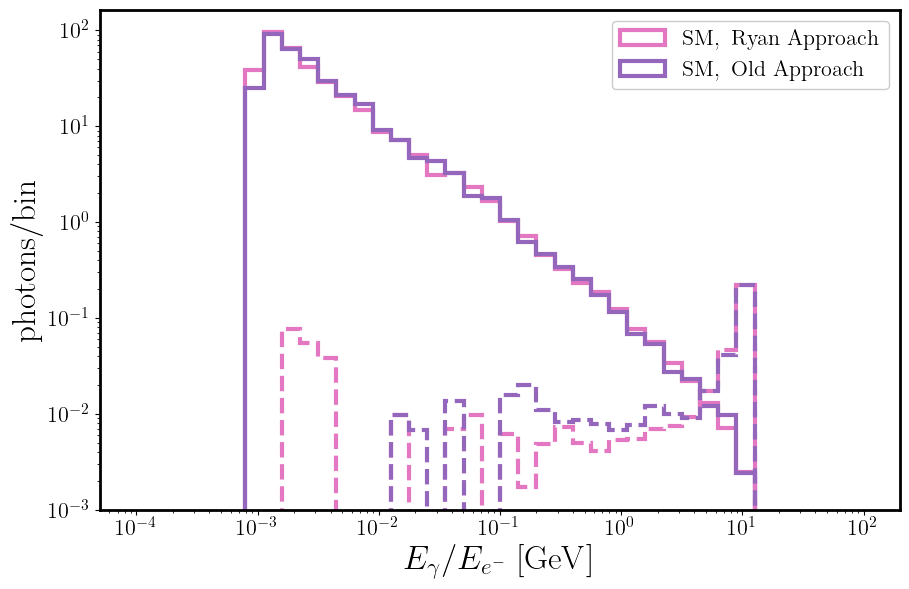

In [51]:
b0 = np.logspace(-4, 2, 41)

dens = True
plt.hist(Es, bins=b0, histtype='step', lw=3, color='C6', density=dens, ls='-', label=r"$\mathrm{SM,\ Ryan\ Approach}$")
plt.hist(EsOld, bins=b0, histtype='step', lw=3, color='C4', ls='-', density=dens, label=r"$\mathrm{SM,\ Old\ Approach}$")
plt.hist(EsE, bins=b0, histtype='step', lw=3, color='C6', density=dens, ls='--')
plt.hist(EsEOld, bins=b0, histtype='step', lw=3, color='C4', ls='--', density=dens)

plt.gca().legend(loc='best', fontsize=16, framealpha=1.0)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$E_\gamma/E_{e^-}\ [\mathrm{GeV}]$", fontsize=24)
plt.gca().set_ylabel(r"$\mathrm{photons/bin}$", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(8.0, 5.0)


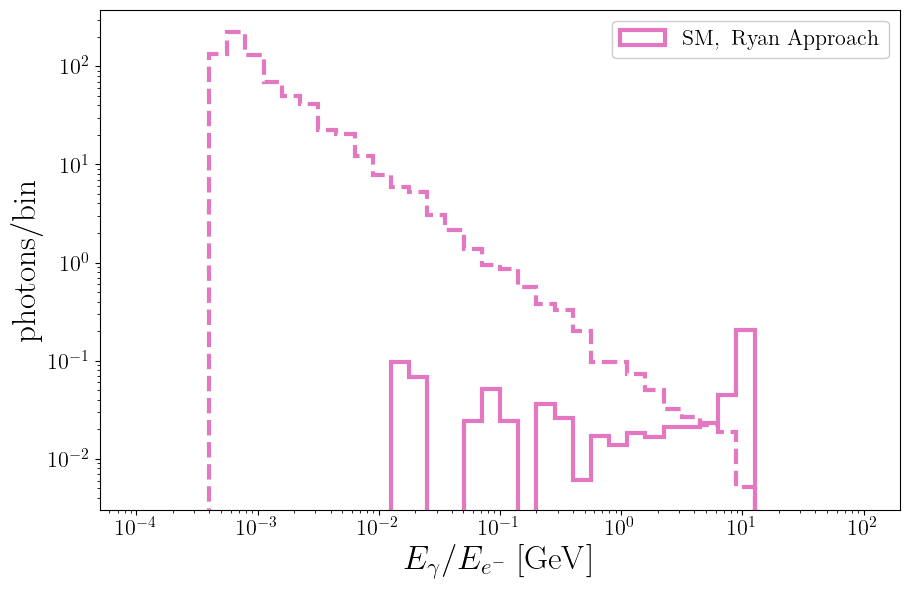

In [12]:
b0 = np.logspace(-4, 2, 41)

dens = True
plt.hist(EsComp, bins=b0, histtype='step', lw=3, color='C6', density=dens, ls='-', label=r"$\mathrm{SM,\ Ryan\ Approach}$")
plt.hist(EsEComp, bins=b0, histtype='step', lw=3, color='C6', density=dens, ls='--')

plt.gca().legend(loc='best', fontsize=16, framealpha=1.0)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$E_\gamma/E_{e^-}\ [\mathrm{GeV}]$", fontsize=24)
plt.gca().set_ylabel(r"$\mathrm{photons/bin}$", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(8.0, 5.0)


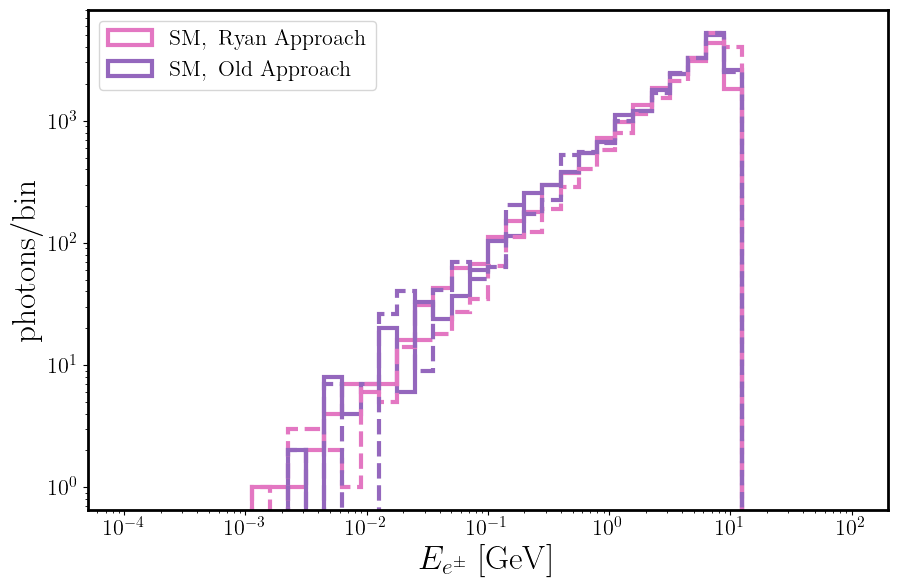

In [52]:
b0 = np.logspace(-4, 2, 41)

dens=False 

plt.hist(EsG, bins=b0, histtype='step', lw=3, color='C6', density=dens, ls='-', label=r"$\mathrm{SM,\ Ryan\ Approach}$")
plt.hist(EsGOld, bins=b0, histtype='step', lw=3, color='C4', ls='-', density=dens, label=r"$\mathrm{SM,\ Old\ Approach}$")
plt.hist(EsGP, bins=b0, histtype='step', lw=3, color='C6', density=dens, ls='--')
plt.hist(EsGPOld, bins=b0, histtype='step', lw=3, color='C4', ls='--', density=dens)

plt.gca().legend(loc=2, fontsize=16)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$E_{e^\pm}\ [\mathrm{GeV}]$", fontsize=24)
plt.gca().set_ylabel(r"$\mathrm{photons/bin}$", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(8.0, 5.0)


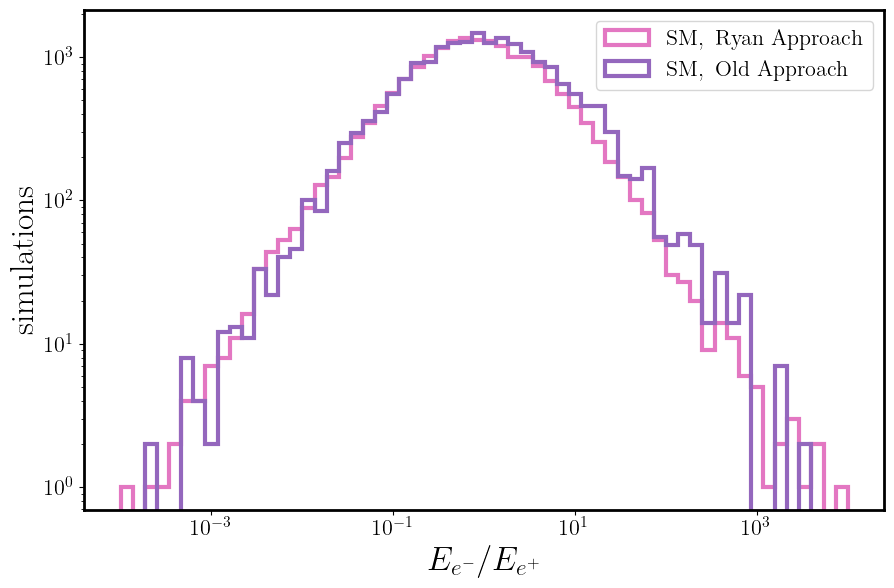

In [53]:
b0 = np.logspace(-4, 4, 61)

plt.hist(EsG/EsGP, bins=b0, histtype='step', lw=3, color='C6', density=False, ls='-', label=r"$\mathrm{SM,\ Ryan\ Approach}$")
plt.hist(EsGOld/EsGPOld, bins=b0, histtype='step', lw=3, color='C4', ls='-', density=False, label=r"$\mathrm{SM,\ Old\ Approach}$")

plt.gca().legend(loc=1, fontsize=16)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$E_{e^-}/E_{e^+}$", fontsize=24)
plt.gca().set_ylabel(r"$\mathrm{simulations}$", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(8.0, 5.0)


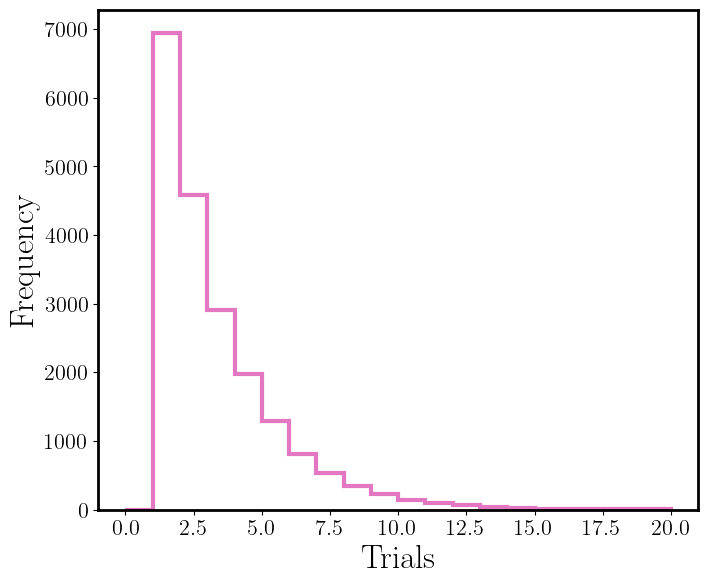

In [56]:
plt.hist(trials, bins=np.linspace(0,20,21), histtype='step', lw=3, color='C6', ls='-')

#plt.gca().legend(loc=1, fontsize=16)
#plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$\mathrm{Trials}$", fontsize=24)
plt.gca().set_ylabel(r"$\mathrm{Frequency}$", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(6.0, 5.0)


In [69]:
def slowShower():
    s0 = sGraphite.GenShower(11, p0.get_p0(), 22, VB=True)
    return

def fastShower():
    s0 = sGraphiteOld.GenShower(11, p0.get_p0(), 22, VB=True)
    return

In [70]:
profileSS = cProfile.Profile()
profileSS.runcall(slowShower)
psSS = pstats.Stats(profileSS)
psSS.print_stats()

Starting shower, initial particle with ID Info
[11.  1. 22.  0.  0. -1.  1.]
Initial four-momenta:
[10.          0.          0.          9.99999999]


/Users/kjkelly/Documents/miniforge3/envs/kjk/lib/python3.10/site-packages/PETITE/kinematics.py:71: RuntimeWarning: invalid value encountered in sqrt
  pm, pp = np.sqrt(epm**2 - me**2), np.sqrt(epp**2 - me**2)
/Users/kjkelly/Documents/miniforge3/envs/kjk/lib/python3.10/site-packages/PETITE/kinematics.py:21: RuntimeWarning: invalid value encountered in sqrt
  p, pp = np.sqrt(ep**2 - me**2), np.sqrt(epp**2 - me**2)


         1441500 function calls (1436263 primitive calls) in 1.611 seconds

   Random listing order was used

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    44019    0.002    0.000    0.002    0.000 {method 'append' of 'list' objects}
      811    0.000    0.000    0.000    0.000 {method 'bit_length' of 'int' objects}
     4410    0.000    0.000    0.000    0.000 {method 'items' of 'dict' objects}
        2    0.000    0.000    0.000    0.000 {method 'update' of 'dict' objects}
        2    0.000    0.000    0.000    0.000 {method 'copy' of 'dict' objects}
        2    0.000    0.000    0.000    0.000 {method 'add' of 'set' objects}
        2    0.000    0.000    0.000    0.000 {method 'discard' of 'set' objects}
       11    0.000    0.000    0.000    0.000 {method 'split' of 'str' objects}
        2    0.000    0.000    0.000    0.000 {method 'rstrip' of 'str' objects}
       11    0.000    0.000    0.000    0.000 {method 'splitlines' of 'str' objects}
  

In [72]:
profileFS = cProfile.Profile()
profileFS.runcall(fastShower)
psFS = pstats.Stats(profileFS)
psFS.print_stats()

Starting shower, initial particle with ID Info
[11.  1. 22.  0.  0. -1.  1.]
Initial four-momenta:
[10.          0.          0.          9.99999999]
         825383 function calls (822512 primitive calls) in 0.343 seconds

   Random listing order was used

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1071    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
      746    0.000    0.000    0.000    0.000 {method 'bit_length' of 'int' objects}
        6    0.000    0.000    0.000    0.000 {method 'items' of 'dict' objects}
        2    0.000    0.000    0.000    0.000 {method 'update' of 'dict' objects}
        2    0.001    0.001    0.001    0.001 {method 'copy' of 'dict' objects}
        2    0.000    0.000    0.000    0.000 {method 'add' of 'set' objects}
        2    0.000    0.000    0.000    0.000 {method 'discard' of 'set' objects}
       11    0.000    0.000    0.000    0.000 {method 'split' of 'str' objects}
        2    0.000   

More code to come when we're confident in other changes

In [73]:
SMS = sGraphite.GenShower(11, p0.get_p0(), 22, VB=True)

Starting shower, initial particle with ID Info
[11.  1. 22.  0.  0. -1.  1.]
Initial four-momenta:
[10.          0.          0.          9.99999999]


In [93]:
SMSLead = sLead.GenShower(11, p0.get_p0(), 22, VB=True)

Starting shower, initial particle with ID Info
[11.  1. 22.  0.  0. -1.  1.]
Initial four-momenta:
[10.          0.          0.          9.99999999]


/Users/kjkelly/Documents/miniforge3/envs/kjk/lib/python3.10/site-packages/PETITE/kinematics.py:71: RuntimeWarning: invalid value encountered in sqrt
  pm, pp = np.sqrt(epm**2 - me**2), np.sqrt(epp**2 - me**2)
/Users/kjkelly/Documents/miniforge3/envs/kjk/lib/python3.10/site-packages/PETITE/kinematics.py:21: RuntimeWarning: invalid value encountered in sqrt
  p, pp = np.sqrt(ep**2 - me**2), np.sqrt(epp**2 - me**2)


In [74]:
SMSOld = sGraphiteOld.GenShower(11, p0.get_p0(), 22, VB=True)

Starting shower, initial particle with ID Info
[11.  1. 22.  0.  0. -1.  1.]
Initial four-momenta:
[10.          0.          0.          9.99999999]


In [94]:
SMSPhotons = np.array(SMS)[np.where([ps.get_IDs()[0] == 22 for ps in SMS])[0]]
SMSOldPhotons = np.array(SMSOld)[np.where([ps.get_IDs()[0] == 22 for ps in SMSOld])[0]]

SMSLeadPhotons = np.array(SMSLead)[np.where([ps.get_IDs()[0] == 22 for ps in SMSLead])[0]]


In [76]:
SMSElectrons = np.array(SMS)[np.where([ps.get_IDs()[0] == 11 for ps in SMS])[0]]
SMSOldElectrons = np.array(SMSOld)[np.where([ps.get_IDs()[0] == 11 for ps in SMSOld])[0]]

SMSPositrons = np.array(SMS)[np.where([ps.get_IDs()[0] == -11 for ps in SMS])[0]]
SMSOldPositrons = np.array(SMSOld)[np.where([ps.get_IDs()[0] == -11 for ps in SMSOld])[0]]

In [77]:
print(len(SMS), len(SMSOld))
print(len(SMSPhotons), len(SMSOldPhotons))
print(len(SMSElectrons), len(SMSOldElectrons))
print(len(SMSPositrons), len(SMSOldPositrons))

1048 1056
265 323
472 395
311 338


In [78]:
print(sGraphite.GetMFP(11, 5.0), sGraphiteOld.GetMFP(11, 5.0))

0.022319484615447728 0.022319484615447735


In [79]:
SMS[0].get_rf()

[2.378696393746357e-06, -5.347373167607564e-06, 0.017051626563204754]

In [80]:
SMSOld[0].get_rf()

[4.910868843334266e-07, -1.7100307237065636e-06, 0.00892015134304125]

In [81]:
print(SMS[1].get_IDs(), SMSOld[1].get_IDs())
print(SMS[1].get_p0(), SMSOld[1].get_p0())
print()
print(SMS[2].get_IDs(), SMSOld[2].get_IDs())
print(SMS[2].get_p0(), SMSOld[2].get_p0())

[11.  2. 11.  1.  1.  0.  1.] [11.  2. 11.  1.  1.  0.  1.]
[ 6.83347872e+00  1.32684044e-03 -9.62503783e-04  6.83347850e+00] [9.98550472e+00 1.25392653e-04 1.73119455e-04 9.98550471e+00]

[22.  3. 11.  1.  1.  0.  1.] [22.  3. 11.  1.  1.  0.  1.]
[ 3.15898447e+00 -1.15969593e-04  8.41326229e-05  3.15898446e+00] [ 1.05525718e-02 -2.21791562e-07  1.26238360e-07  1.05525718e-02]


In [82]:
np.min([s0.get_pf()[0] for s0 in SMS])

0.010005150637348767

In [83]:
PhotonEs = np.array([s.get_p0()[0] for s in SMSPhotons])
PhotonEsOld = np.array([s.get_p0()[0] for s in SMSOldPhotons])

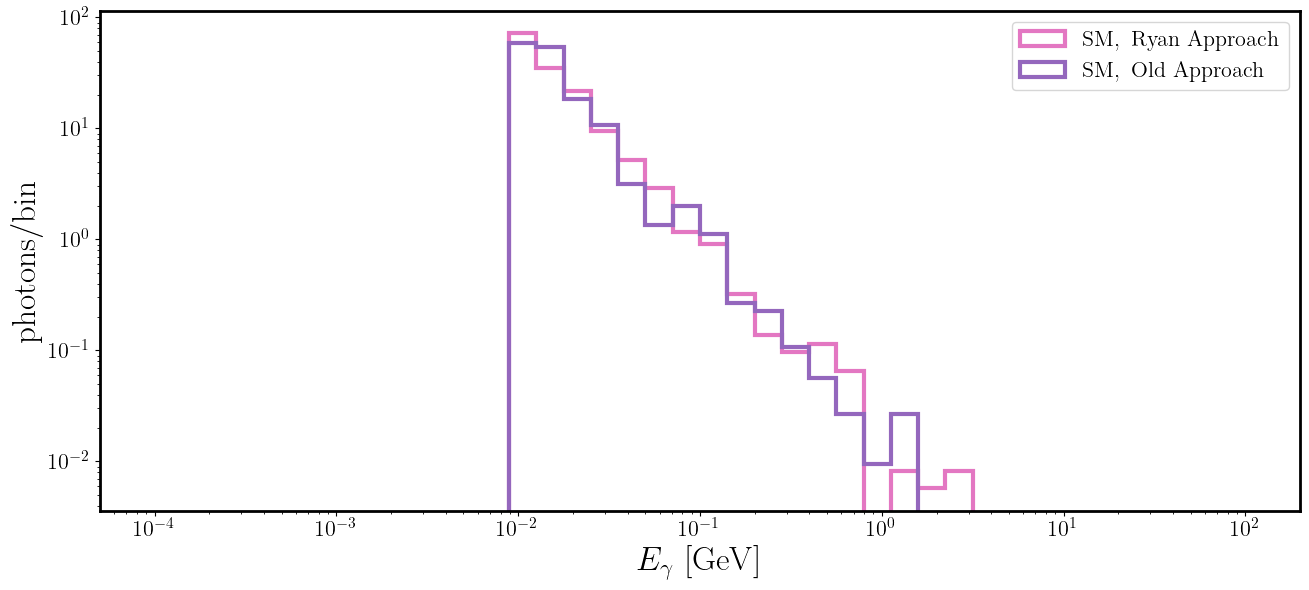

In [84]:
b0 = np.logspace(-4, 2, 41)

plt.hist(PhotonEs, bins=b0, histtype='step', lw=3, color='C6', density=True, ls='-', label=r"$\mathrm{SM,\ Ryan\ Approach}$")
plt.hist(PhotonEsOld, bins=b0, histtype='step', lw=3, color='C4', ls='-', density=True, label=r"$\mathrm{SM,\ Old\ Approach}$")

plt.gca().legend(loc=1, fontsize=16)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$E_\gamma\ [\mathrm{GeV}]$", fontsize=24)
plt.gca().set_ylabel(r"$\mathrm{photons/bin}$", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(12.0, 5.0)


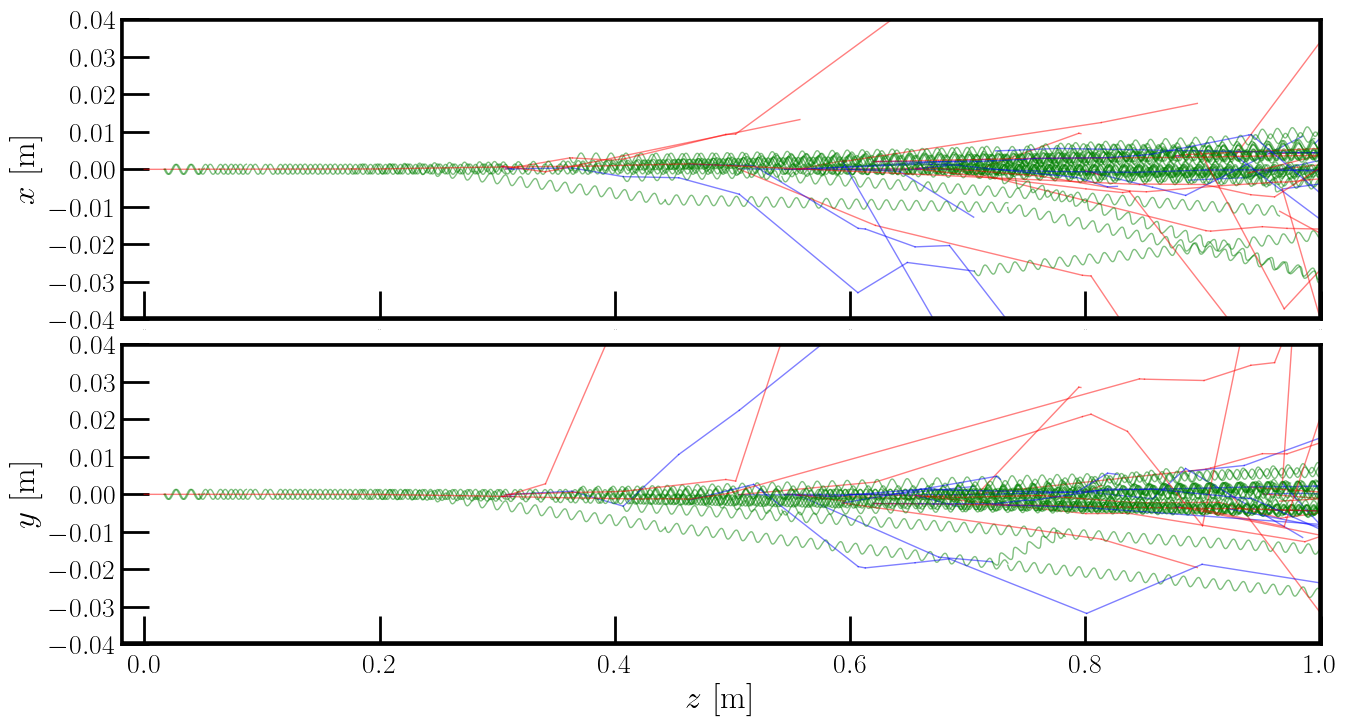

In [85]:
figwid = 6.0*2.0
fighei = 6.0*0.5
lside = 3.0
rside = 3.5
wwspace = 1.25

ncol = 1
nrow = 2

wid = lside + ncol*figwid + (ncol-1)*wwspace + rside

bot = 3.77
top = 3.5
hhspace = 0.25

hei = bot + nrow*fighei + (nrow-1)*hhspace + top

lfactor = lside/wid
rfactor = rside/wid
bfactor = bot/hei
tfactor = top/hei
wfactor = wwspace/figwid
hfactor = hhspace/fighei

matplotlib.rcParams['axes.linewidth'] = 2.0
fig, axes = plt.subplots(nrow, ncol, figsize=(wid, hei), facecolor='1.0');
fig.subplots_adjust(left = lfactor, bottom=bfactor, right=(1.0-rfactor), top=(1.0-tfactor), wspace=wfactor, hspace=hfactor);

xmin, xmax, ymin, ymax = -0.02, 1, -0.04, 0.04
#xmin, xmax, ymin, ymax = -1.0, 5.0, -0.4, 0.4

ax = axes[0]
ax.axis([xmin, xmax, ymin, ymax])
ax.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=4, zorder=50)
#ax.set_xlabel(r'$z\ [\mathrm{m}]$', fontproperties=font)        
ax.set_ylabel(r'$x\ [\mathrm{m}]$', fontproperties=font)        

ax.tick_params(direction='in', zorder=30, length=20, width=2)
ax.tick_params(direction='in', which='minor', zorder=30, length=15, width=1.5)
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
[l.set_size((0)) for l in ax.get_xticklabels()]
[l.set_size((labelfont.get_size())) for l in ax.get_yticklabels()]

for ki0 in SMS:
    ki = np.concatenate([ki0.get_r0(), ki0.get_rf()])
    if ki0.get_IDs()[0] == 22:
        with matplotlib.rc_context({'path.sketch': (5, 15, 1)}):
            ax.plot([ki[2], ki[5]], [ki[0], ki[3]], lw=1, ls='-', color='g', alpha=0.5)
    if ki0.get_IDs()[0] == 11:
        ax.plot([ki[2], ki[5]], [ki[0], ki[3]], lw=1, ls='-', color='r', alpha=0.5)
    if ki0.get_IDs()[0] == -11:
        ax.plot([ki[2], ki[5]], [ki[0], ki[3]], lw=1, ls='-', color='b', alpha=0.5)

ax = axes[1]
ax.axis([xmin, xmax, ymin, ymax])
ax.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=4, zorder=50)
ax.set_xlabel(r'$z\ [\mathrm{m}]$', fontproperties=font)        
ax.set_ylabel(r'$y\ [\mathrm{m}]$', fontproperties=font)        

ax.tick_params(direction='in', zorder=30, length=20, width=2)
ax.tick_params(direction='in', which='minor', zorder=30, length=15, width=1.5)
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
[l.set_size((labelfont.get_size())) for l in ax.get_xticklabels()]
[l.set_size((labelfont.get_size())) for l in ax.get_yticklabels()]

for ki0 in SMS:
    ki = np.concatenate([ki0.get_r0(), ki0.get_rf()])
    if ki0.get_IDs()[0] == 22:
        with matplotlib.rc_context({'path.sketch': (5, 15, 1)}):
            ax.plot([ki[2], ki[5]], [ki[1], ki[4]], lw=1, ls='-', color='g', alpha=0.5)
    if ki0.get_IDs()[0] == 11:
        ax.plot([ki[2], ki[5]], [ki[1], ki[4]], lw=1, ls='-', color='r', alpha=0.5)
    if ki0.get_IDs()[0] == -11:
        ax.plot([ki[2], ki[5]], [ki[1], ki[4]], lw=1, ls='-', color='b', alpha=0.5)



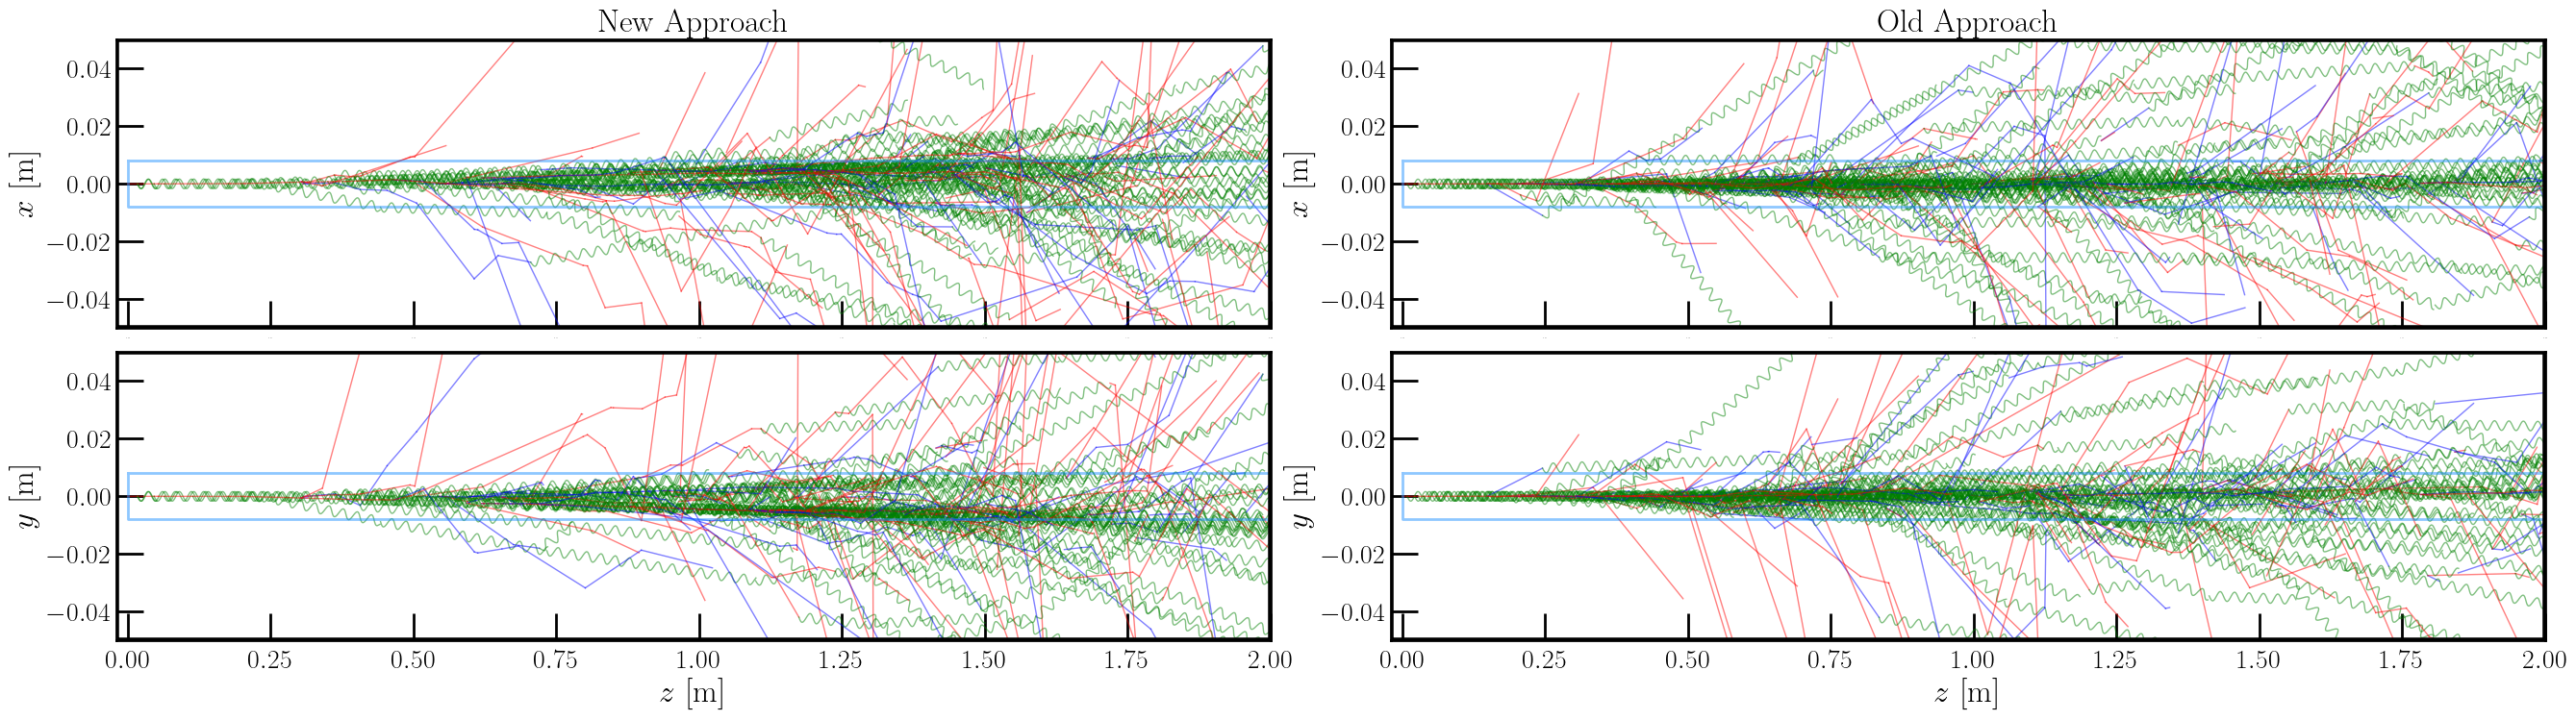

In [92]:
figwid = 6.0*2.0
fighei = 6.0*0.5
lside = 3.0
rside = 3.5
wwspace = 1.25

ncol = 2
nrow = 2

wid = lside + ncol*figwid + (ncol-1)*wwspace + rside

bot = 3.77
top = 3.5
hhspace = 0.25

hei = bot + nrow*fighei + (nrow-1)*hhspace + top

lfactor = lside/wid
rfactor = rside/wid
bfactor = bot/hei
tfactor = top/hei
wfactor = wwspace/figwid
hfactor = hhspace/fighei

matplotlib.rcParams['axes.linewidth'] = 2.0
fig, axes = plt.subplots(nrow, ncol, figsize=(wid, hei), facecolor='1.0');
fig.subplots_adjust(left = lfactor, bottom=bfactor, right=(1.0-rfactor), top=(1.0-tfactor), wspace=wfactor, hspace=hfactor);

xmin, xmax, ymin, ymax = -0.02, 2, -0.05, 0.05
#xmin, xmax, ymin, ymax = -1.0, 5.0, -0.4, 0.4

ax = axes[0][0]
ax.axis([xmin, xmax, ymin, ymax])
ax.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=4, zorder=50)
#ax.set_xlabel(r'$z\ [\mathrm{m}]$', fontproperties=font)        
ax.set_ylabel(r'$x\ [\mathrm{m}]$', fontproperties=font)        
ax.set_title(r"$\mathrm{New\ Approach}$", fontproperties=font)

ax.tick_params(direction='in', zorder=30, length=20, width=2)
ax.tick_params(direction='in', which='minor', zorder=30, length=15, width=1.5)
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
[l.set_size((0)) for l in ax.get_xticklabels()]
[l.set_size((labelfont.get_size())) for l in ax.get_yticklabels()]

for ki0 in SMS:
    ki = np.concatenate([ki0.get_r0(), ki0.get_rf()])
    if ki0.get_IDs()[0] == 22:
        with matplotlib.rc_context({'path.sketch': (5, 15, 1)}):
            ax.plot([ki[2], ki[5]], [ki[0], ki[3]], lw=1, ls='-', color='g', alpha=0.5)
    if ki0.get_IDs()[0] == 11:
        ax.plot([ki[2], ki[5]], [ki[0], ki[3]], lw=1, ls='-', color='r', alpha=0.5)
    if ki0.get_IDs()[0] == -11:
        ax.plot([ki[2], ki[5]], [ki[0], ki[3]], lw=1, ls='-', color='b', alpha=0.5)

ax = axes[1][0]
ax.axis([xmin, xmax, ymin, ymax])
ax.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=4, zorder=50)
ax.set_xlabel(r'$z\ [\mathrm{m}]$', fontproperties=font)        
ax.set_ylabel(r'$y\ [\mathrm{m}]$', fontproperties=font)        

ax.tick_params(direction='in', zorder=30, length=20, width=2)
ax.tick_params(direction='in', which='minor', zorder=30, length=15, width=1.5)
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
[l.set_size((labelfont.get_size())) for l in ax.get_xticklabels()]
[l.set_size((labelfont.get_size())) for l in ax.get_yticklabels()]

for ki0 in SMS:
    ki = np.concatenate([ki0.get_r0(), ki0.get_rf()])
    if ki0.get_IDs()[0] == 22:
        with matplotlib.rc_context({'path.sketch': (5, 15, 1)}):
            ax.plot([ki[2], ki[5]], [ki[1], ki[4]], lw=1, ls='-', color='g', alpha=0.5)
    if ki0.get_IDs()[0] == 11:
        ax.plot([ki[2], ki[5]], [ki[1], ki[4]], lw=1, ls='-', color='r', alpha=0.5)
    if ki0.get_IDs()[0] == -11:
        ax.plot([ki[2], ki[5]], [ki[1], ki[4]], lw=1, ls='-', color='b', alpha=0.5)


ax = axes[0][1]
ax.axis([xmin, xmax, ymin, ymax])
ax.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=4, zorder=50)
#ax.set_xlabel(r'$z\ [\mathrm{m}]$', fontproperties=font)        
ax.set_ylabel(r'$x\ [\mathrm{m}]$', fontproperties=font)        
ax.set_title(r"$\mathrm{Old\ Approach}$", fontproperties=font)

ax.tick_params(direction='in', zorder=30, length=20, width=2)
ax.tick_params(direction='in', which='minor', zorder=30, length=15, width=1.5)
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
[l.set_size((0)) for l in ax.get_xticklabels()]
[l.set_size((labelfont.get_size())) for l in ax.get_yticklabels()]

for ki0 in SMSOld:
    ki = np.concatenate([ki0.get_r0(), ki0.get_rf()])
    if ki0.get_IDs()[0] == 22:
        with matplotlib.rc_context({'path.sketch': (5, 15, 1)}):
            ax.plot([ki[2], ki[5]], [ki[0], ki[3]], lw=1, ls='-', color='g', alpha=0.5)
    if ki0.get_IDs()[0] == 11:
        ax.plot([ki[2], ki[5]], [ki[0], ki[3]], lw=1, ls='-', color='r', alpha=0.5)
    if ki0.get_IDs()[0] == -11:
        ax.plot([ki[2], ki[5]], [ki[0], ki[3]], lw=1, ls='-', color='b', alpha=0.5)

ax = axes[1][1]
ax.axis([xmin, xmax, ymin, ymax])
ax.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=4, zorder=50)
ax.set_xlabel(r'$z\ [\mathrm{m}]$', fontproperties=font)        
ax.set_ylabel(r'$y\ [\mathrm{m}]$', fontproperties=font)        

ax.tick_params(direction='in', zorder=30, length=20, width=2)
ax.tick_params(direction='in', which='minor', zorder=30, length=15, width=1.5)
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
[l.set_size((labelfont.get_size())) for l in ax.get_xticklabels()]
[l.set_size((labelfont.get_size())) for l in ax.get_yticklabels()]

for ki0 in SMSOld:
    ki = np.concatenate([ki0.get_r0(), ki0.get_rf()])
    if ki0.get_IDs()[0] == 22:
        with matplotlib.rc_context({'path.sketch': (5, 15, 1)}):
            ax.plot([ki[2], ki[5]], [ki[1], ki[4]], lw=1, ls='-', color='g', alpha=0.5)
    if ki0.get_IDs()[0] == 11:
        ax.plot([ki[2], ki[5]], [ki[1], ki[4]], lw=1, ls='-', color='r', alpha=0.5)
    if ki0.get_IDs()[0] == -11:
        ax.plot([ki[2], ki[5]], [ki[1], ki[4]], lw=1, ls='-', color='b', alpha=0.5)

for ax in axes[0]:
    ax.plot([0, 2.2, 2.2, 0, 0], [0.008, 0.008, -0.008, -0.008, 0.008], lw=2, color='dodgerblue', ls='-', alpha=0.5)
for ax in axes[1]:
    ax.plot([0, 2.2, 2.2, 0, 0], [0.008, 0.008, -0.008, -0.008, 0.008], lw=2, color='dodgerblue', ls='-', alpha=0.5)


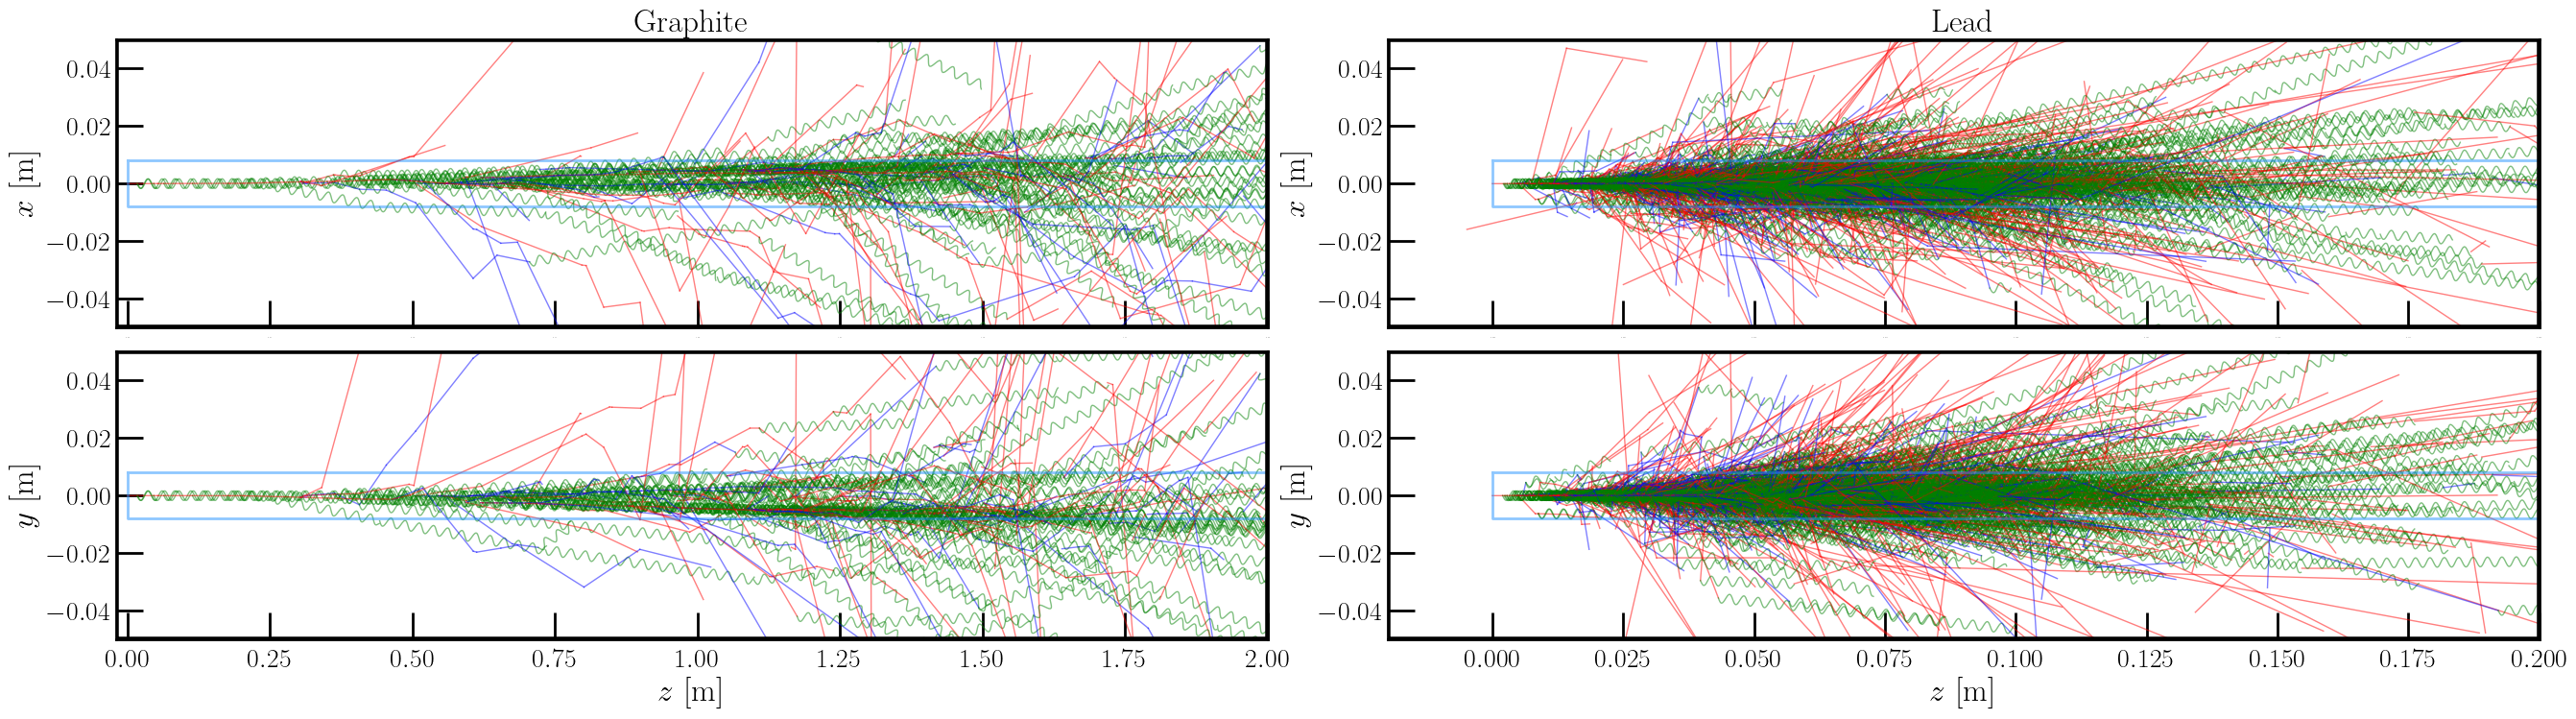

In [96]:
figwid = 6.0*2.0
fighei = 6.0*0.5
lside = 3.0
rside = 3.5
wwspace = 1.25

ncol = 2
nrow = 2

wid = lside + ncol*figwid + (ncol-1)*wwspace + rside

bot = 3.77
top = 3.5
hhspace = 0.25

hei = bot + nrow*fighei + (nrow-1)*hhspace + top

lfactor = lside/wid
rfactor = rside/wid
bfactor = bot/hei
tfactor = top/hei
wfactor = wwspace/figwid
hfactor = hhspace/fighei

matplotlib.rcParams['axes.linewidth'] = 2.0
fig, axes = plt.subplots(nrow, ncol, figsize=(wid, hei), facecolor='1.0');
fig.subplots_adjust(left = lfactor, bottom=bfactor, right=(1.0-rfactor), top=(1.0-tfactor), wspace=wfactor, hspace=hfactor);

xmin, xmax, ymin, ymax = -0.02, 2, -0.05, 0.05
#xmin, xmax, ymin, ymax = -1.0, 5.0, -0.4, 0.4

ax = axes[0][0]
ax.axis([xmin, xmax, ymin, ymax])
ax.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=4, zorder=50)
#ax.set_xlabel(r'$z\ [\mathrm{m}]$', fontproperties=font)        
ax.set_ylabel(r'$x\ [\mathrm{m}]$', fontproperties=font)        
ax.set_title(r"$\mathrm{Graphite}$", fontproperties=font)

ax.tick_params(direction='in', zorder=30, length=20, width=2)
ax.tick_params(direction='in', which='minor', zorder=30, length=15, width=1.5)
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
[l.set_size((0)) for l in ax.get_xticklabels()]
[l.set_size((labelfont.get_size())) for l in ax.get_yticklabels()]

for ki0 in SMS:
    ki = np.concatenate([ki0.get_r0(), ki0.get_rf()])
    if ki0.get_IDs()[0] == 22:
        with matplotlib.rc_context({'path.sketch': (5, 15, 1)}):
            ax.plot([ki[2], ki[5]], [ki[0], ki[3]], lw=1, ls='-', color='g', alpha=0.5)
    if ki0.get_IDs()[0] == 11:
        ax.plot([ki[2], ki[5]], [ki[0], ki[3]], lw=1, ls='-', color='r', alpha=0.5)
    if ki0.get_IDs()[0] == -11:
        ax.plot([ki[2], ki[5]], [ki[0], ki[3]], lw=1, ls='-', color='b', alpha=0.5)

ax = axes[1][0]
ax.axis([xmin, xmax, ymin, ymax])
ax.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=4, zorder=50)
ax.set_xlabel(r'$z\ [\mathrm{m}]$', fontproperties=font)        
ax.set_ylabel(r'$y\ [\mathrm{m}]$', fontproperties=font)        

ax.tick_params(direction='in', zorder=30, length=20, width=2)
ax.tick_params(direction='in', which='minor', zorder=30, length=15, width=1.5)
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
[l.set_size((labelfont.get_size())) for l in ax.get_xticklabels()]
[l.set_size((labelfont.get_size())) for l in ax.get_yticklabels()]

for ki0 in SMS:
    ki = np.concatenate([ki0.get_r0(), ki0.get_rf()])
    if ki0.get_IDs()[0] == 22:
        with matplotlib.rc_context({'path.sketch': (5, 15, 1)}):
            ax.plot([ki[2], ki[5]], [ki[1], ki[4]], lw=1, ls='-', color='g', alpha=0.5)
    if ki0.get_IDs()[0] == 11:
        ax.plot([ki[2], ki[5]], [ki[1], ki[4]], lw=1, ls='-', color='r', alpha=0.5)
    if ki0.get_IDs()[0] == -11:
        ax.plot([ki[2], ki[5]], [ki[1], ki[4]], lw=1, ls='-', color='b', alpha=0.5)


xmin, xmax, ymin, ymax = -0.02, 0.2, -0.05, 0.05


ax = axes[0][1]
ax.axis([xmin, xmax, ymin, ymax])
ax.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=4, zorder=50)
#ax.set_xlabel(r'$z\ [\mathrm{m}]$', fontproperties=font)        
ax.set_ylabel(r'$x\ [\mathrm{m}]$', fontproperties=font)        
ax.set_title(r"$\mathrm{Lead}$", fontproperties=font)

ax.tick_params(direction='in', zorder=30, length=20, width=2)
ax.tick_params(direction='in', which='minor', zorder=30, length=15, width=1.5)
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
[l.set_size((0)) for l in ax.get_xticklabels()]
[l.set_size((labelfont.get_size())) for l in ax.get_yticklabels()]

for ki0 in SMSLead:
    ki = np.concatenate([ki0.get_r0(), ki0.get_rf()])
    if ki0.get_IDs()[0] == 22:
        with matplotlib.rc_context({'path.sketch': (5, 15, 1)}):
            ax.plot([ki[2], ki[5]], [ki[0], ki[3]], lw=1, ls='-', color='g', alpha=0.5)
    if ki0.get_IDs()[0] == 11:
        ax.plot([ki[2], ki[5]], [ki[0], ki[3]], lw=1, ls='-', color='r', alpha=0.5)
    if ki0.get_IDs()[0] == -11:
        ax.plot([ki[2], ki[5]], [ki[0], ki[3]], lw=1, ls='-', color='b', alpha=0.5)

ax = axes[1][1]
ax.axis([xmin, xmax, ymin, ymax])
ax.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=4, zorder=50)
ax.set_xlabel(r'$z\ [\mathrm{m}]$', fontproperties=font)        
ax.set_ylabel(r'$y\ [\mathrm{m}]$', fontproperties=font)        

ax.tick_params(direction='in', zorder=30, length=20, width=2)
ax.tick_params(direction='in', which='minor', zorder=30, length=15, width=1.5)
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
[l.set_size((labelfont.get_size())) for l in ax.get_xticklabels()]
[l.set_size((labelfont.get_size())) for l in ax.get_yticklabels()]

for ki0 in SMSLead:
    ki = np.concatenate([ki0.get_r0(), ki0.get_rf()])
    if ki0.get_IDs()[0] == 22:
        with matplotlib.rc_context({'path.sketch': (5, 15, 1)}):
            ax.plot([ki[2], ki[5]], [ki[1], ki[4]], lw=1, ls='-', color='g', alpha=0.5)
    if ki0.get_IDs()[0] == 11:
        ax.plot([ki[2], ki[5]], [ki[1], ki[4]], lw=1, ls='-', color='r', alpha=0.5)
    if ki0.get_IDs()[0] == -11:
        ax.plot([ki[2], ki[5]], [ki[1], ki[4]], lw=1, ls='-', color='b', alpha=0.5)

for ax in axes[0]:
    ax.plot([0, 2.2, 2.2, 0, 0], [0.008, 0.008, -0.008, -0.008, 0.008], lw=2, color='dodgerblue', ls='-', alpha=0.5)
for ax in axes[1]:
    ax.plot([0, 2.2, 2.2, 0, 0], [0.008, 0.008, -0.008, -0.008, 0.008], lw=2, color='dodgerblue', ls='-', alpha=0.5)


In [65]:
sLead = Shower('/Users/kjkelly/Documents/GitHub/PETITE/RyanDicts/Feb13_', 'lead', MinEnergy,neval=10000,maxF_fudge_global=50.0)


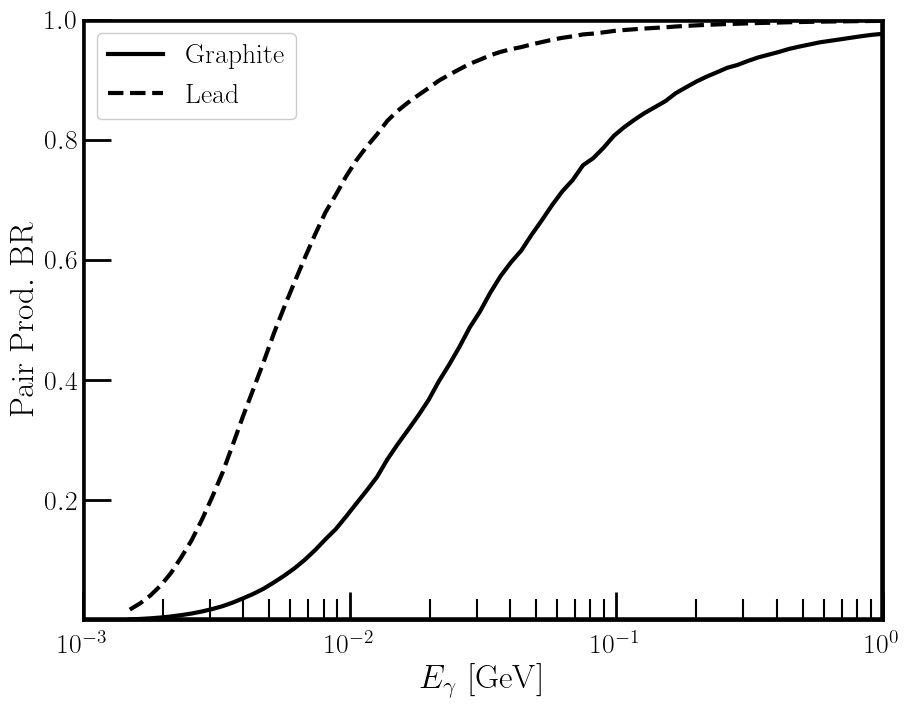

In [97]:
figwid = 6.0*4/3
fighei = 6.0
lside = 3.0
rside = 3.5
wwspace = 1.25

ncol = 1
nrow = 1

wid = lside + ncol*figwid + (ncol-1)*wwspace + rside

bot = 3.77
top = 3.5
hhspace = 0.25

hei = bot + nrow*fighei + (nrow-1)*hhspace + top

lfactor = lside/wid
rfactor = rside/wid
bfactor = bot/hei
tfactor = top/hei
wfactor = wwspace/figwid
hfactor = hhspace/fighei

matplotlib.rcParams['axes.linewidth'] = 2.0
fig, axes = plt.subplots(nrow, ncol, figsize=(wid, hei), facecolor='1.0');
fig.subplots_adjust(left = lfactor, bottom=bfactor, right=(1.0-rfactor), top=(1.0-tfactor), wspace=wfactor, hspace=hfactor);

xmin, xmax, ymin, ymax = 0.001, 1, 0.001, 1
#xmin, xmax, ymin, ymax = -1.0, 5.0, -0.4, 0.4

ax = axes
ax.set_xscale('log')
#ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=4, zorder=50)
#ax.set_xlabel(r'$z\ [\mathrm{m}]$', fontproperties=font)        
ax.set_xlabel(r'$E_{\gamma}\ [\mathrm{GeV}]$', fontproperties=font)        
ax.set_ylabel(r'$\mathrm{Pair\ Prod.\ BR}$', fontproperties=font)        

ax.tick_params(direction='in', zorder=30, length=20, width=2)
ax.tick_params(direction='in', which='minor', zorder=30, length=15, width=1.5)
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
[l.set_size((labelfont.get_size())) for l in ax.get_xticklabels()]
[l.set_size((labelfont.get_size())) for l in ax.get_yticklabels()]

ax.plot(np.logspace(np.log10(0.0015), np.log10(10), 100), sGraphite.BF_Photon_PP(np.logspace(np.log10(0.0015), np.log10(10), 100)), lw=3, color='k', ls='-', label=r"$\mathrm{Graphite}$")
ax.plot(np.logspace(np.log10(0.0015), np.log10(10), 100), sLead.BF_Photon_PP(np.logspace(np.log10(0.0015), np.log10(10), 100)), lw=3, color='k', ls='--', label=r"$\mathrm{Lead}$")
ax.legend(loc='best', prop=labelfont, framealpha=1.0)